## DATA IMPORT

In [1]:
from DATA import NARMA10

narma = NARMA10(True, [60,0,40])

X_TR, Y_TR = narma.TR()
X_VAL, Y_VAL = narma.VAL()
X_TS, Y_TS = narma.TS()


In [2]:
print(X_TR.shape, Y_TR.shape)
print(X_VAL.shape, Y_VAL.shape)
print(X_TS.shape, Y_TS.shape)

torch.Size([6000]) torch.Size([6000])
torch.Size([0]) torch.Size([0])
torch.Size([4000]) torch.Size([4000])


## ESN (No IP)

In [13]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(Reservoir(1, 1000, ro_rescale=0.85, sparsity=0.7))

In [20]:
network.train(X_TR, Y_TR, 0.25)

[0.7590179330407221, 0.004509725293145251, 0.24319599551280216]


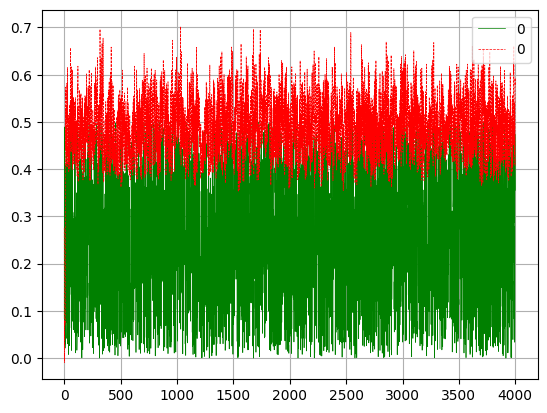

In [19]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [52]:
network.MC(X_TR, 200)

1.6255447988108218

## Classic IP ESN (Normal Distribution)

In [53]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, 0.5)

ip_mask = IPMask.normalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [ ]:
ip_reservoir.pre_train_batch(X_TR, 0.025)

In [ ]:
ip_reservoir.IP_loss

In [56]:
ip_reservoir.predict(X_TR, False, True)

tensor([[-0.1984, -0.1535, -0.0064,  ...,  0.1178, -0.1519,  0.3512],
        [-0.4373,  0.3109, -0.0558,  ...,  0.7117, -0.6655, -0.1353],
        [-0.6766,  0.7448,  0.0448,  ...,  0.8209, -0.8274, -0.2393],
        ...,
        [-0.7166,  0.7548,  0.8128,  ...,  0.9578, -0.8252, -0.6083],
        [-0.7164,  0.7757,  0.7915,  ...,  0.9491, -0.8462, -0.5553],
        [-0.7218,  0.8168,  0.7392,  ...,  0.9320, -0.8530, -0.4752]],
       grad_fn=<CopySlices>)

In [57]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.8820700645446777)  ACTUAL_STD == (0.04573555663228035)][ TARGET_MEAN == (0.005616167560219765) TARGET_STD == (1.0067012310028076)]
Unit - (2): [ ACTUAL_MEAN == (0.9797393083572388)  ACTUAL_STD == (0.14425775408744812)][ TARGET_MEAN == (-0.007545732893049717) TARGET_STD == (0.9870521426200867)]
Unit - (3): [ ACTUAL_MEAN == (1.1116546392440796)  ACTUAL_STD == (0.1346360743045807)][ TARGET_MEAN == (-0.006305614486336708) TARGET_STD == (1.0011136531829834)]
Unit - (4): [ ACTUAL_MEAN == (-0.45902061462402344)  ACTUAL_STD == (0.1501297503709793)][ TARGET_MEAN == (-0.0012978501617908478) TARGET_STD == (0.987392783164978)]
Unit - (5): [ ACTUAL_MEAN == (2.014815092086792)  ACTUAL_STD == (0.1196586936712265)][ TARGET_MEAN == (-0.01149293314665556) TARGET_STD == (1.0015490055084229)]
Unit - (6): [ ACTUAL_MEAN == (1.0301095247268677)  ACTUAL_STD == (0.05133788660168648)][ TARGET_MEAN == (-0.005897617898881435) TARGET_STD == (1.0133254528045654)]
Unit - (7): [ ACTUA

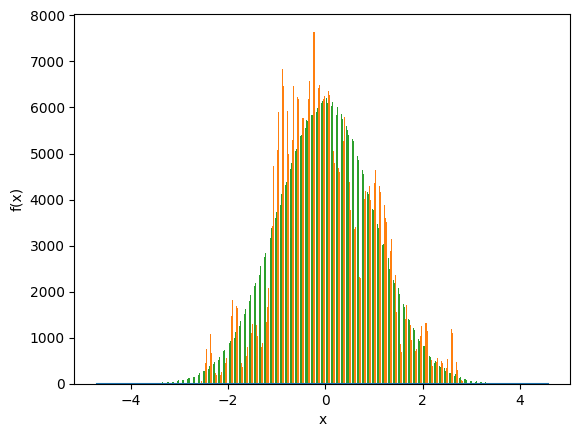

In [58]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [89]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.025)

[1.0245257616823287, 0.007117348754726418, 0.36350199110755]


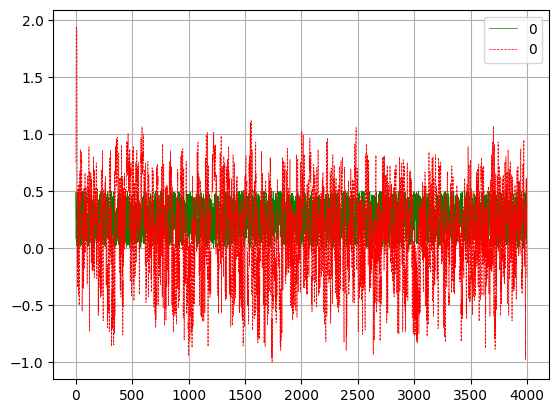

In [90]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Alternate Positive and Negative Gaussian Distribution)


In [94]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, 0.5)

ip_mask = IPMask.mixedBimodalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [120]:
ip_reservoir.pre_train_batch(X_TR, 0.005)

tensor([ 0.6833,  0.9975,  0.9997,  0.5033,  0.9343,  0.8009,  0.9331,  0.8147,
         0.8433,  0.7029,  1.0079,  0.9153,  0.1513,  0.6290,  0.9132,  0.8004,
         1.0753,  0.8020,  0.5387,  0.6103,  1.0486,  1.1006,  0.3659,  0.8417,
         0.3003,  0.7691,  0.3132,  0.8526,  0.4471,  0.9213,  1.0507,  0.9770,
         0.9283,  0.2333,  1.0088,  0.4104,  0.9322,  0.7160,  0.5949,  1.0590,
         0.9988, -0.0734,  0.5969,  0.2769,  0.6220,  1.0160,  0.8852,  0.2034,
         0.8570,  0.8301,  0.8849,  0.7271,  0.5935,  1.0067,  0.9538,  0.8035,
         0.9252,  0.8321,  0.4433,  0.4889,  0.6401,  1.1144,  0.8669,  0.9413,
         0.1566,  0.8405,  0.9928,  0.9046,  0.5952,  1.1315,  0.6284,  0.7500,
         0.9062,  0.8247,  0.9606,  0.4735,  0.9362,  0.2925,  0.6744,  0.7938,
         0.6462,  0.9268,  0.9812,  0.8948,  0.9606,  0.1783,  0.9790,  0.7148,
         0.8049,  0.3031,  0.2190,  0.9461,  0.6624,  0.9269,  0.4955,  0.5876,
         0.6918,  1.1505,  0.3917,  0.50

In [121]:
ip_reservoir.IP_loss

tensor(336.6022, grad_fn=<SumBackward0>)

In [122]:
ip_reservoir.predict(X_TR, False, True)

tensor([[-0.3563,  0.2907, -0.7797,  ...,  0.6991, -0.8382,  0.7161],
        [-0.3903,  0.1702, -0.7307,  ...,  0.6958, -0.8472,  0.7721],
        [-0.4110,  0.1735, -0.7348,  ...,  0.6777, -0.8500,  0.7599],
        ...,
        [-0.5337,  0.5528, -0.7310,  ...,  0.7018, -0.7573,  0.4758],
        [-0.5097,  0.5295, -0.7396,  ...,  0.7005, -0.7715,  0.5133],
        [-0.4629,  0.4485, -0.7459,  ...,  0.7002, -0.7931,  0.5828]],
       grad_fn=<CopySlices>)

In [ ]:
ip_reservoir.printIPstats()

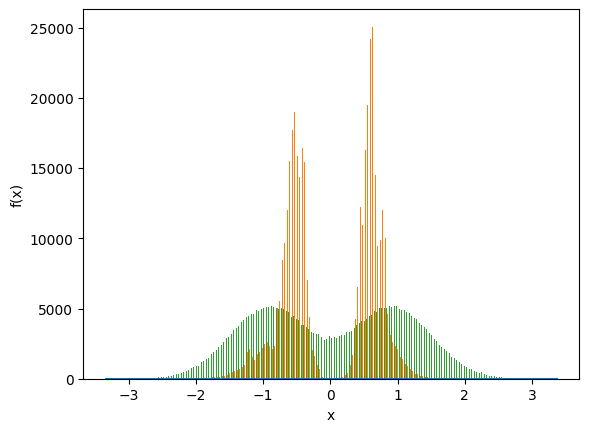

In [123]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [132]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.0025)

[0.9976626751374387, 0.048251358160054075, 2.506872423951678]


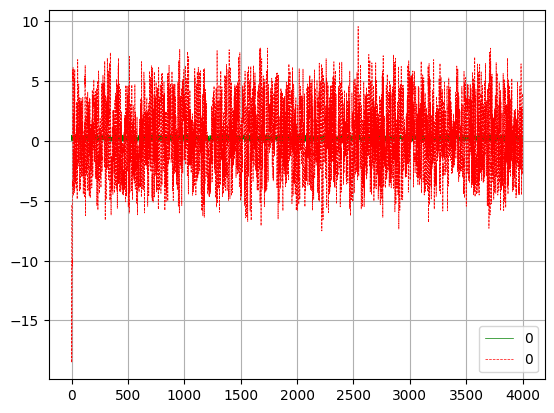

In [133]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## Critical IP ESN (Mixture of Gaussian)


In [135]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100, 0.5)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.set_IP_mask(ip_mask)

In [148]:
ip_reservoir.pre_train_batch(X_TR, 0.015)

tensor([ 0.5369,  0.7101,  0.5823,  0.8238,  0.6259,  0.9096,  0.6305,  0.8538,
         0.7754,  0.4638,  0.5360,  0.8208,  0.6251,  0.6982,  0.7501,  0.3922,
         0.8847,  0.2883,  0.9163,  0.8946,  0.9223,  0.3212,  0.8700,  0.8997,
         0.7362,  0.7840,  0.6484,  0.8013,  0.8094,  0.7132,  0.7078,  0.6895,
         0.8011,  0.5944,  0.5369,  0.8314,  0.4949,  1.0358,  0.7946,  0.5788,
         0.8831,  0.5763,  0.7800,  0.8155,  0.7398,  0.8790,  0.7009,  0.7871,
         0.5086,  0.6006,  0.9541,  0.8451,  0.7319,  0.5088,  0.7573,  0.6888,
         0.6913,  0.6595,  0.9213,  0.4288,  0.7185,  0.7184,  0.8097,  0.6868,
         0.3089,  0.5986,  0.8854,  0.1926,  0.7608,  0.5421,  0.2405,  0.8308,
         0.5684,  0.5238,  0.8100,  0.9175,  0.7219,  0.7434,  0.5706,  0.8345,
         0.7989,  0.9175,  0.9892,  0.7021,  0.8880,  0.8162,  0.4884,  0.9341,
         0.7413,  0.8980,  0.4756,  0.8324,  0.7722,  0.1069,  0.6972,  0.8489,
         0.7997, -0.0508,  0.4906,  0.63

In [149]:
ip_reservoir.IP_loss

tensor(1505.7593, grad_fn=<SumBackward0>)

In [150]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 0.3804, -0.3459,  0.3587,  ...,  0.1594,  0.5637, -0.0070],
        [ 0.1950, -0.5051,  0.5952,  ...,  0.1431,  0.4694,  0.2191],
        [ 0.1145, -0.6158,  0.5048,  ...,  0.1251,  0.3943,  0.2487],
        ...,
        [-0.4509, -0.4361,  0.4287,  ..., -0.0203,  0.0891,  0.2809],
        [-0.4058, -0.4788,  0.3836,  ..., -0.0030,  0.1208,  0.2529],
        [-0.2995, -0.5432,  0.3354,  ...,  0.0267,  0.1661,  0.2226]],
       grad_fn=<CopySlices>)

In [151]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.4666222333908081)  ACTUAL_STD == (0.143011674284935)][ TARGET_MEAN == (-0.004384051542729139) TARGET_STD == (1.091852068901062)]
Unit - (2): [ ACTUAL_MEAN == (-0.48034605383872986)  ACTUAL_STD == (0.1045498251914978)][ TARGET_MEAN == (0.0014959302498027682) TARGET_STD == (1.0894994735717773)]
Unit - (3): [ ACTUAL_MEAN == (0.46009600162506104)  ACTUAL_STD == (0.10884135961532593)][ TARGET_MEAN == (0.008097879588603973) TARGET_STD == (1.0803771018981934)]
Unit - (4): [ ACTUAL_MEAN == (0.8827854990959167)  ACTUAL_STD == (0.09606943279504776)][ TARGET_MEAN == (0.01245706994086504) TARGET_STD == (1.0974578857421875)]
Unit - (5): [ ACTUAL_MEAN == (-0.3487967848777771)  ACTUAL_STD == (0.07405901700258255)][ TARGET_MEAN == (0.012579183094203472) TARGET_STD == (1.0813509225845337)]
Unit - (6): [ ACTUAL_MEAN == (-0.020881623029708862)  ACTUAL_STD == (0.05618607997894287)][ TARGET_MEAN == (0.020995937287807465) TARGET_STD == (1.0843546390533447)]
Unit - (7): [ ACT

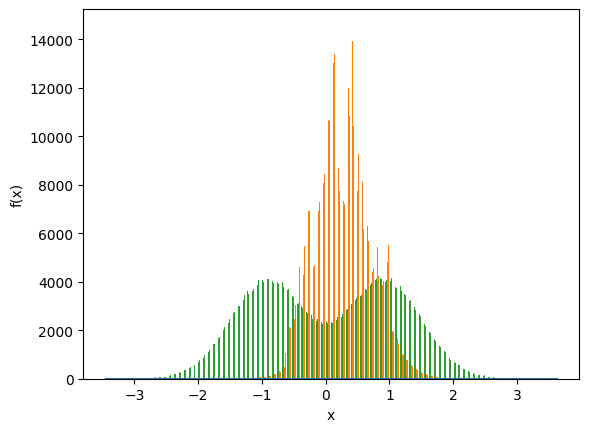

In [152]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [169]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.0025)

[1.0435231239239025, 0.04840870980673717, 2.986020550305801]


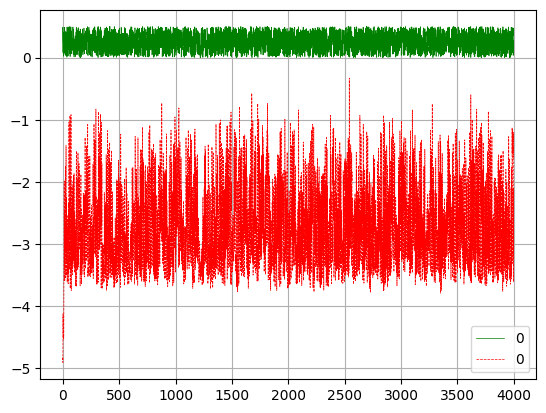

In [170]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

## [BIASED] Critical IP ESN (Mixture of Gaussian)

In [ ]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1, 100, 1, bias=True)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [44]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10, 0.5, bias=True)

ip_mask = IPMask.mixedBimodalMask(10)

ip_reservoir.set_IP_mask(ip_mask)

In [45]:
ip_reservoir.pre_train_batch(X_TR, 10.8)

RuntimeError: The size of tensor a (2) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
ip_reservoir.IP_loss

tensor(0.0268, grad_fn=<MeanBackward0>)

In [46]:
ip_reservoir.predict(X_TR, False, True)

RuntimeError: The size of tensor a (2) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.15120364725589752)  ACTUAL_STD == (0.062700554728508)][ TARGET_MEAN == (-0.9221815466880798) TARGET_STD == (0.5799744725227356)]
Unit - (2): [ ACTUAL_MEAN == (0.35700950026512146)  ACTUAL_STD == (0.173091322183609)][ TARGET_MEAN == (0.9074978828430176) TARGET_STD == (0.5743977427482605)]
Unit - (3): [ ACTUAL_MEAN == (0.11008638888597488)  ACTUAL_STD == (0.10568013042211533)][ TARGET_MEAN == (-0.9213858246803284) TARGET_STD == (0.573934018611908)]
Unit - (4): [ ACTUAL_MEAN == (-0.4829472005367279)  ACTUAL_STD == (0.16155694425106049)][ TARGET_MEAN == (0.9141884446144104) TARGET_STD == (0.5752613544464111)]
Unit - (5): [ ACTUAL_MEAN == (-0.47328120470046997)  ACTUAL_STD == (0.16465026140213013)][ TARGET_MEAN == (-0.9276319742202759) TARGET_STD == (0.583648681640625)]
Unit - (6): [ ACTUAL_MEAN == (0.35542264580726624)  ACTUAL_STD == (0.12721987068653107)][ TARGET_MEAN == (0.9157033562660217) TARGET_STD == (0.58946293592453)]
Unit - (7): [ ACTUAL_MEAN == (0

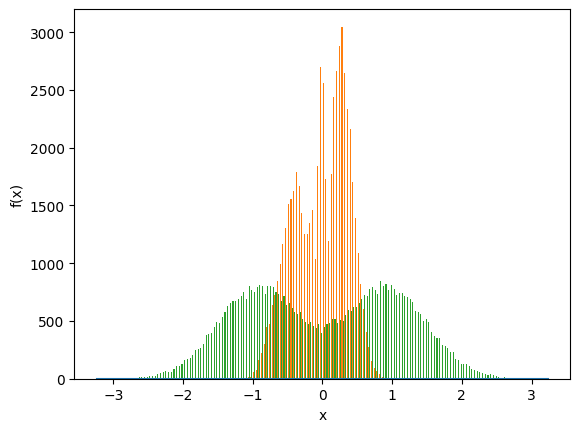

In [ ]:
ip_reservoir.plot_overall_activation_distribution(True)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR, Y_TR, 0.05)

[1.612964470909222, 0.006868140695271846, 0.40407581331681125]


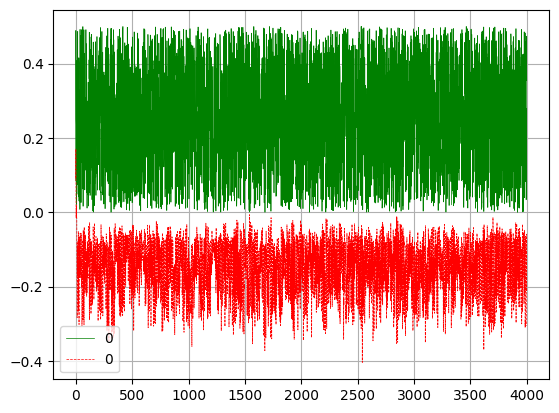

In [ ]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])